In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
movies_data = pd.read_csv("C:/Users/Hitesh/Desktop/Data Science/Movie-Recommendation-System/Movielens dataset/movie_data_final (1).csv")
movies_data.head()

,movieId,imdbId,tmdbId,cast,crew,director,keywords,adult,belongs_to_collection,budget,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,1,114709,862.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,jealousy|toy|boy|friendship|friends|rivalry|bo...,False,Toy Story Collection,30000000,...,373554033.0,81.0,English,Released,NaN,Toy Story,False,7.7,5415.0,1995
1,2,113497,8844.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,board game|disappearance|based on children's b...,False,NaN,65000000,...,262797249.0,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,3,113228,15602.0,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,fishing|best friend|duringcreditsstinger|old men,False,Grumpy Old Men Collection,0,...,0.0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,4,114885,31357.0,Whitney Houston|Angela Bassett|Loretta Devine|...,"[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,based on novel|interracial relationship|single...,False,NaN,16000000,...,81452156.0,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,5,113041,11862.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,baby|midlife crisis|confidence|aging|daughter|...,False,Father of the Bride Collection,0,...,76578911.0,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995


In [3]:
ratings_data = pd.read_csv('C:/Users/Hitesh/Desktop/Data Science/Movie-Recommendation-System/Movielens dataset/ratings_final (1).csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
print('Movies_df Shape:',movies_data.shape)
print('Ratings_df Shape:',ratings_data.shape)

Movies_df Shape: (9082, 31)
Ratings_df Shape: (95490, 4)


In [10]:
movies_data.columns

Index(['movieId', 'imdbId', 'tmdbId', 'cast', 'crew', 'director', 'keywords',
       'adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'year'],
      dtype='object')

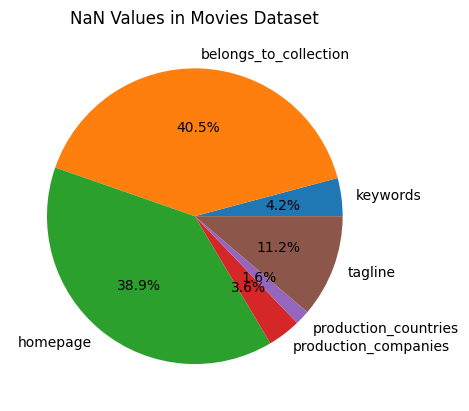

In [41]:
nan_counts = movies_data.isnull().sum()

# Compute the percentage of NaN values for each column
nan_percentages = 100 * nan_counts / len(movies_data)

# Remove columns with NaN percentages less than 10%
nan_percentages = nan_percentages[nan_percentages >= 2]

# Create a pie chart
plt.pie(nan_percentages, labels=nan_percentages.index, autopct='%1.1f%%')
plt.title('NaN Values in Movies Dataset')
plt.show()

In [ ]:
## make a pie chart of nan values in the dataset 


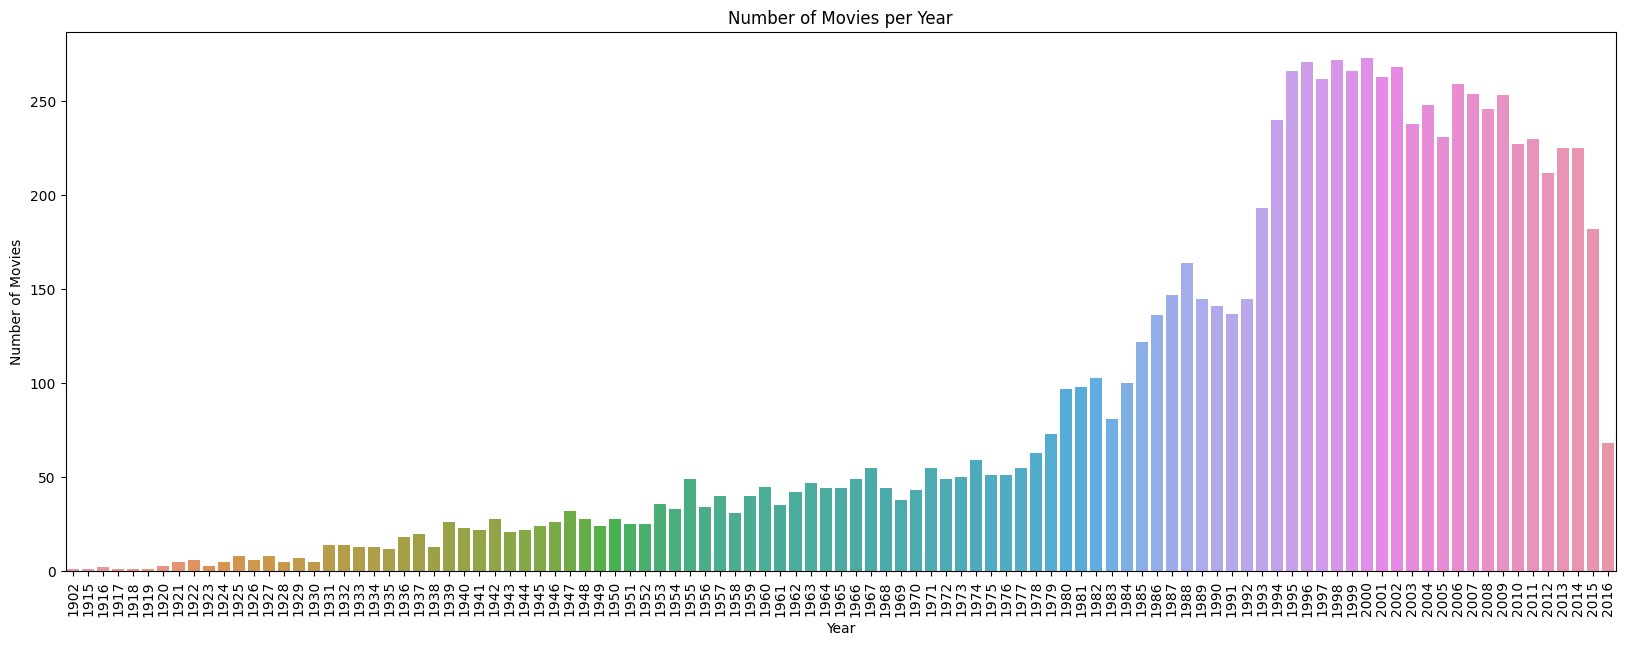

In [5]:
plt.figure(figsize=(20,7))
movies_data_year = movies_data.sort_values(by='year')
sns.countplot(x=movies_data_year['year'], data=movies_data_year)
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.show()

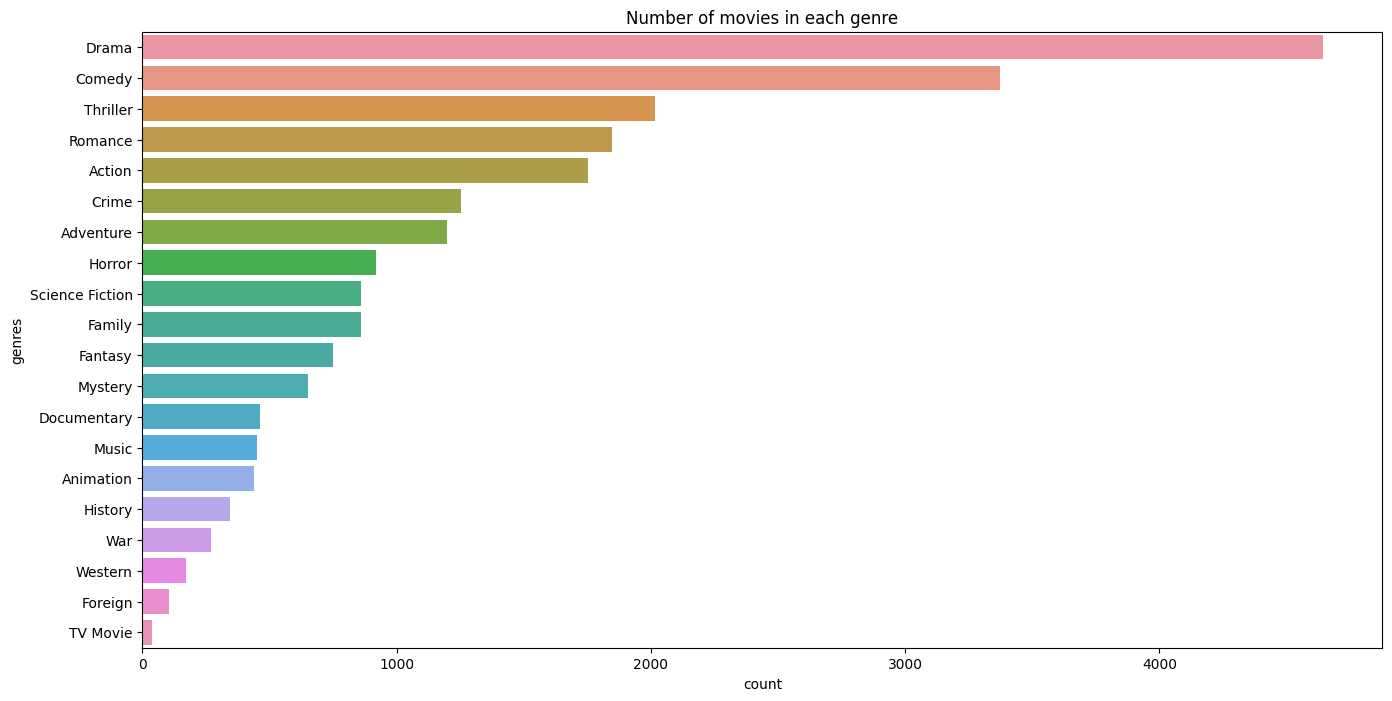

In [6]:
plt.figure(figsize=(16,8))
movies_data['genres'] = movies_data['genres'].str.split('|')
movies_data_genre = movies_data.explode('genres')
sns.countplot(y=movies_data_genre['genres'], order=movies_data_genre['genres'].value_counts().index)
plt.title('Number of movies in each genre')
plt.show()

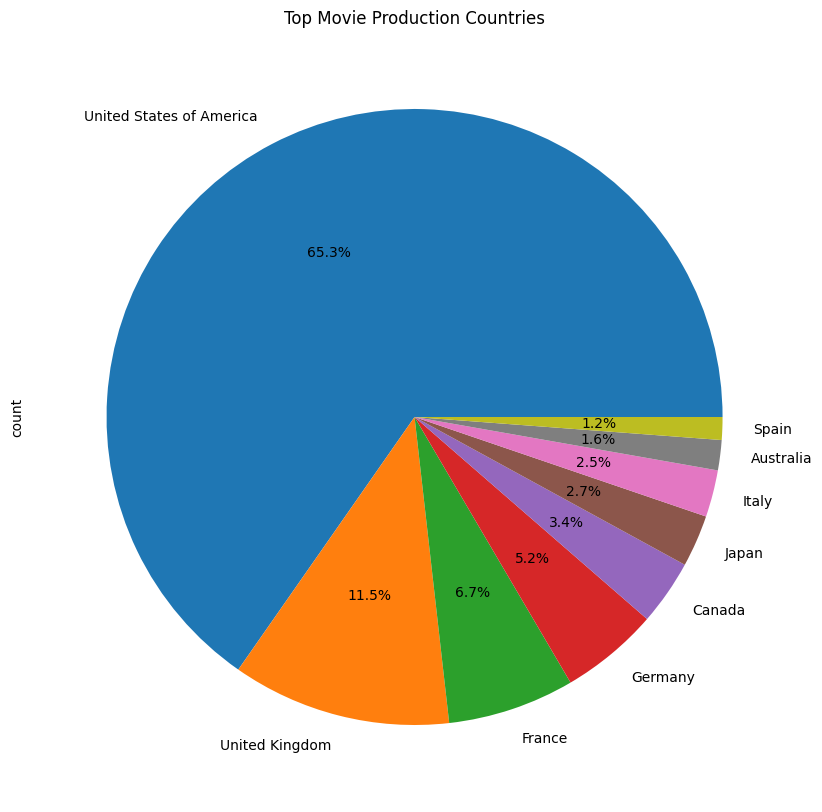

In [30]:
movies_data = pd.read_csv("C:/Users/Hitesh/Desktop/Data Science/Movie-Recommendation-System/Movielens dataset/movie_data_final (1).csv")
movies_data['production_countries'] = movies_data['production_countries'].str.split('|')
movies_data_pc = movies_data.explode('production_countries')
vc = movies_data_pc['production_countries'].value_counts(normalize=True)
filtered_df = movies_data_pc[movies_data_pc['production_countries'].isin(vc[vc >= 0.01].index)]
filtered_df['production_countries'].value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%')
plt.title('Top Movie Production Countries')
plt.show()

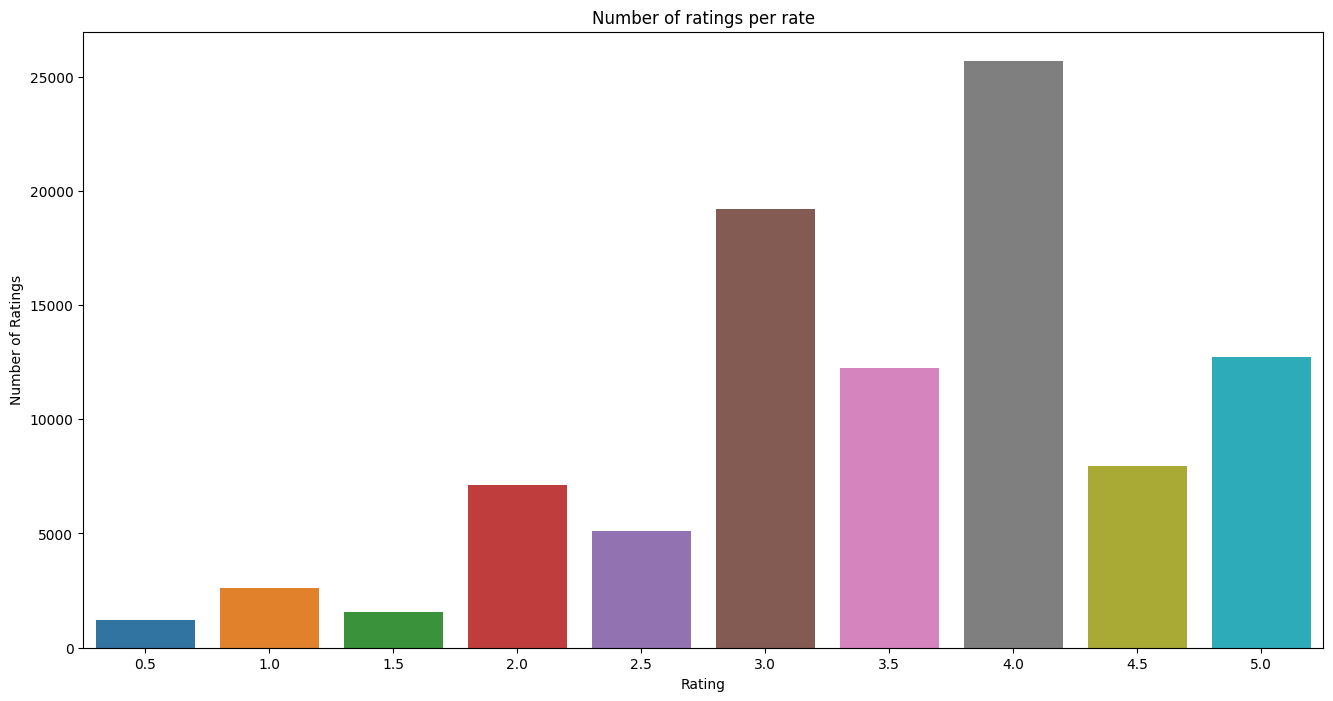

In [7]:
plt.figure(figsize=(16,8))
sns.countplot(x=ratings_data['rating'], data=ratings_data)
plt.title('Number of ratings per rate')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

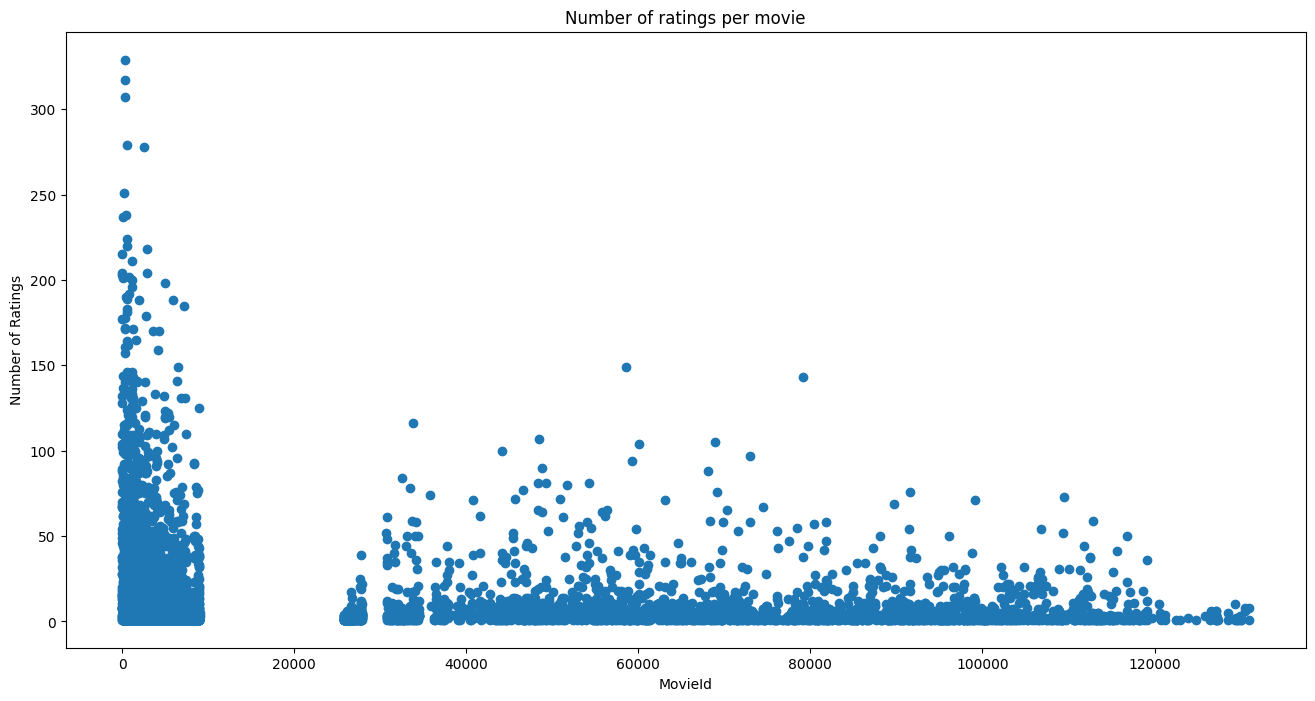

In [8]:
ratings_data_count = pd.DataFrame(ratings_data.groupby('movieId')['rating'].count())
ratings_data_count = ratings_data_count.rename(columns={'rating': 'num_ratings'})
ratings_data_count = ratings_data_count.sort_values('num_ratings', ascending=False)
plt.figure(figsize=(16,8))
plt.scatter(ratings_data_count.index, ratings_data_count['num_ratings'])
plt.title('Number of ratings per movie')
plt.xlabel('MovieId')
plt.ylabel('Number of Ratings')
plt.show()